# 🔔Week06

## NLTK Brown

In [1]:
import nltk
nltk.download('brown', 'inaugural')

[nltk_data] Downloading package brown to inaugural...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [3]:
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories() # genre 는 brown의 categories
    for word in brown.words(categories=genre) # word 는 genre(categories) 내에 속하는 단어들
)

modals = ['can', 'could', 'will', 'would', 'may', 'might']

cfd.tabulate(conditions=brown.categories(), samples=modals)
# tabulate를 통해 표로 나타낼 수 있음
# conditions는 brown의 모든 categories, samples는 조동사 리스트

                  can could  will would   may might 
      adventure    48   154    51   194     7    59 
 belles_lettres   249   216   246   397   221   113 
      editorial   124    57   235   185    79    39 
        fiction    39   168    56   291    10    44 
     government   119    38   244   120   179    13 
        hobbies   276    59   269    83   143    22 
          humor    17    33    13    56     8     8 
        learned   367   159   340   321   336   128 
           lore   170   142   178   188   170    50 
        mystery    45   145    25   189    15    57 
           news    94    87   389   246    93    38 
       religion    84    59    72    69    79    12 
        reviews    45    40    61    48    47    26 
        romance    79   195    49   247    11    51 
science_fiction    16    49    17    80     4    12 


In [3]:
# modal 리스트를 cfd 안에

cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
        if word.lower() == modal
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


## NLTK Inaugural
- 연설문 코퍼스

In [4]:
inaugural = nltk.corpus.inaugural

In [6]:
inaugural.fileids() # '연도-이름.txt' | '2021-Biden.txt'

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [7]:
# ['america', 'citizen']의 빈도수를 cfd로 만들기

cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) # .txt 제외
    # for genre in brown.categories()
    for fileid in inaugural.fileids()
    # for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    for target_word in ['america', 'citizen'] # 소문자인 이유
    
    for word in inaugural.words(fileids=fileid)
        # if word.lower() == target_word
        # if target_word in word.lower()
        if word.lower().startswith(target_word)
)

cfd2.tabulate() # fileid 개수가 많아서 tabulate 보다는 plot이 바람직함

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

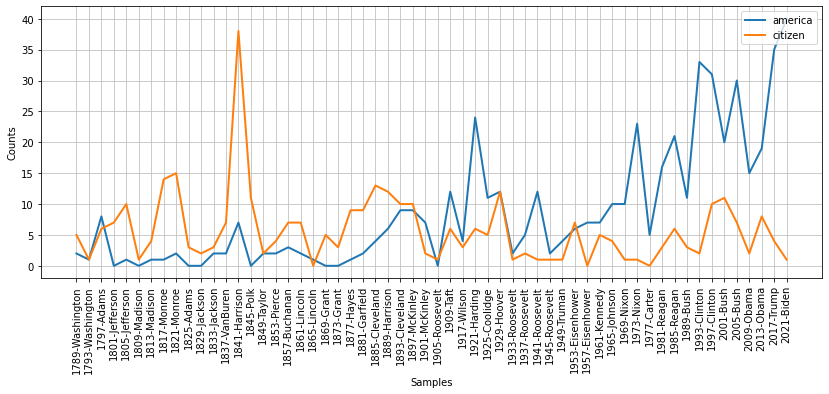

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# !pip install matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5)) # 이미지 크기 조정

cfd2.plot()

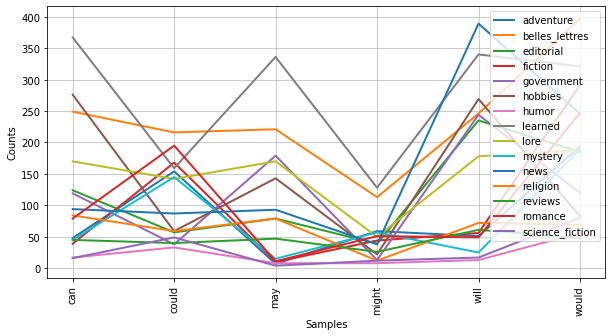

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
plt.figure(figsize=(10, 5))
cfd1.plot()

## Tuple & List

- Tuple(불변 객체) 장점
    - 변하지 않는 데이터 시퀸스를 만들 수 있음.
    - 타인의 접근 막음.
    - 메모리 사용이 적음.
    - 중복 데이터를 사용할 수 있음.
- list(가변 객체) 장점
    - tuple의 장점이 필요없을 시 list를 사용.
    - 데이터를 순차적으로 파악할 때 유용.
    - set와 다르게 중복 데이터를 사용할 수 있음.

In [14]:
# 튜플과 리스트 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()
emptyT, emptyL

((), [])

In [15]:
# 요소가 여러 개인 경우

# alphabetT = ('a', 'b', 'c')
alphabetT = 'a', 'b', 'c' # 괄호 없이 생성 가능
alphabetL = ['a', 'b', 'c']

print(alphabetT)
print(alphabetL)

('a', 'b', 'c')
['a', 'b', 'c']


In [16]:
# 요소가 한 개인 경우

alphaT1 = ('a') # str로 인식
alphaT2 = ('b', )

print(type(alphaT1))
print(type(alphaT2))

<class 'str'>
<class 'tuple'>


- packing: 하나의 변수에 여러 데이터를 할당하는 것
    - tuple, list 자체. 
    - a= [1, 2, 3, 4]
- unpacking: 하나의 변수에 여러 데이터가 들어가 있을 때, 여러 변수에 나눠주는 것
    - a = 'y', b = 'o', c = 'u' 

In [18]:
# unpacking
a, b, c = 'you'
a, b, c # a = 'y', b = 'o', c = 'u'

('y', 'o', 'u')

In [20]:
# 값 교환하기
pwd = 'april'
userid = 'blue'

pwd, userid = userid, pwd
pwd, userid

('blue', 'april')

In [21]:
# 튜플 연산
cal1 = ('a',) + (1, 2)
cal2 = (1, 2, 3) * 2

print(cal1)
print(cal2)

('a', 1, 2)
(1, 2, 3, 1, 2, 3)


In [23]:
x = ('a',)
y = (1, 2, 3)
id(x), id(x + y) # x, y 값 자체는 변환 X

(2497583597696, 2497581697840)

In [24]:
# 튜플 비교
x = 1, 3
y = 1, 4

x < y

True

In [25]:
# 튜플 순회
for i in y:
    print(y)

(1, 4)
(1, 4)


In [27]:
# list comprehension, but 결과물은 리스트로 출력
[i for i in y]

[1, 4]

In [28]:
# tuple comprehension은 존재 X, 형변환은 가능
tuple([i for i in y])

(1, 4)

In [31]:
# 느리기 때문에 거의 사용 X, 정말 tuple을 써야하는 상황이 아닐 시 list가 유용
*[i for i in y],

(1, 4)

In [34]:
animal = 'dog'

# 튜플로 변환
print(tuple(animal))
print((animal, ))

# 리스트로 변환
print(list(animal))
print([animal])

('d', 'o', 'g')
('dog',)
['d', 'o', 'g']
['dog']


In [35]:
# list와 마찬가지로 slicing 가능
animalT = tuple(animal)
animalT[1]

'o'

### list의 유용한 함수
- 변경, 삭제, 추가 함수
- list comprehension 업그레이드

In [44]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [45]:
# append(): 맨 뒤에 요소 하나 추가, 여러 개 추가 불가능
num.append(5)
print(num)

# append(list)를 할 경우 list 추가 가능
num.append([6, 6])
print(num)

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, [6, 6]]


In [46]:
# insert(index, value): 지정한 인덱스에 지정한 값 추가
num.insert(0, 7)
print(num)

[7, 0, 1, 2, 3, 4, 5, [6, 6]]


In [47]:
# extend(list): 맨 뒤에 요소 추가, 인자는 list여야 하고, 여러 개 추가 가능
x = [8, 8]
num.extend(x)
print(num)

# extend는 + 와 같은 기능을 함
num += x
print(num)

[7, 0, 1, 2, 3, 4, 5, [6, 6], 8, 8]
[7, 0, 1, 2, 3, 4, 5, [6, 6], 8, 8, 8, 8]


In [48]:
# offset 수정 가능
num[1] = 9
print(num)

[7, 9, 1, 2, 3, 4, 5, [6, 6], 8, 8, 8, 8]


In [49]:
# slicing 가능
num[:2] = 0, 0
print(num)

[0, 0, 1, 2, 3, 4, 5, [6, 6], 8, 8, 8, 8]


In [50]:
# 문자열은 한 문자 씩 요소에 나눠져서 들어감
num[:3] = 'dog'
print(num)

['d', 'o', 'g', 2, 3, 4, 5, [6, 6], 8, 8, 8, 8]


In [51]:
# del list[]: 구간 인덱스를 지정하여 삭제 가능
del num[:3]
print(num)

[2, 3, 4, 5, [6, 6], 8, 8, 8, 8]


In [52]:
# remove(value): 값을 지정하여 삭제 가능
num.remove(8) # 중복된 값일 경우 가장 먼저 나오는 값 삭제
num

[2, 3, 4, 5, [6, 6], 8, 8, 8]

In [53]:
# pop(index): index를 지정하여 삭제 가능. default는 -1 즉 맨 마지막 값 삭제
num.pop()
num

[2, 3, 4, 5, [6, 6], 8, 8]

In [54]:
# clear(): 모든 요소 삭제
num.clear()
num

[]

In [55]:
# 인덱스 값 찾기
num = list(range(5))
num.index(4)

4

In [57]:
# 리스트 안에 값이 존재하는지 파악
print(1 in num)
print(10 in num)

True
False


In [61]:
# sorted(list): 리스트 복사하여 정렬한 후 출력하기
print(sorted(num)) # 오름차순

print(sorted(num, reverse=True)) # 내림차순

print(num) # 기존 리스트 자체는 정렬되지 X 

[0, 1, 2, 3, 4]
[4, 3, 2, 1, 0]
[4, 3, 2, 1, 0]


In [62]:
# 리스트.sort(), 값 할당하지 않아도 됨.
num.sort() # 오름차순
print(num)

num.sort(reverse=True) # 내림차순
print(num)

[0, 1, 2, 3, 4]
[4, 3, 2, 1, 0]


In [66]:
num.reverse() # 값 반환 O
print(num)
reversed(num) # 값 반환 X
print(list(reversed(num)))

[4, 3, 2, 1, 0]
[0, 1, 2, 3, 4]


In [75]:
# 할당하기
a = list(range(1, 5))
print(a)

b = a # 메모리주소 참조
b[0] = 5
print(a, b)

[1, 2, 3, 4]
[5, 2, 3, 4] [5, 2, 3, 4]


In [76]:
# a 와 b의 메모리주소 일치
id(a), id(b)

(2497583842816, 2497583842816)

In [77]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법, 얕은 복사
c = a.copy()
d = list(a)
e = a[:]

print(a, c, d, e)
id(a), id(c), id(d), id(e) # 메모리주소가 모두 다름

[5, 2, 3, 4] [5, 2, 3, 4] [5, 2, 3, 4] [5, 2, 3, 4]


(2497583842816, 2497583576896, 2497583750528, 2497583828480)

In [78]:
a.append([1, 2, 3])
f = a.copy()

print(a, f)
id(a), id(f) # shallow copy를 사용하여 메모리주소가 다름

f[-1][0] = 9 
print(a, f) # shallow copy여도 리스트 안의 값을 변화시키면서 값이 같이 변할 수 있음

[5, 2, 3, 4, [1, 2, 3]] [5, 2, 3, 4, [1, 2, 3]]
[5, 2, 3, 4, [9, 2, 3]] [5, 2, 3, 4, [9, 2, 3]]


In [80]:
# deepcopy: 깊은 복사, 하위에 중첩되 리스트 요소가 안 바뀌도록 함

import copy
g = copy.deepcopy(a)
print(g)

g[-1][0] = 10
print(a, g)

[5, 2, 3, 4, [9, 2, 3]]
[5, 2, 3, 4, [9, 2, 3]] [5, 2, 3, 4, [10, 2, 3]]


In [81]:
# 리스트 순회 1: zip
name = ['nike', 'addidas', 'newbalance']
number = [107, 500, 996]

# (name, number)
for item1, item2 in zip(name, number): # 여러 리스트 동시에 순회 가능
    print((item1, item2))

('nike', 107)
('addidas', 500)
('newbalance', 996)


In [83]:
# zip와 중첩 for loop문의 차이
for item1 in name:
    for item2 in number:
        print((item1, item2))

('nike', 107)
('nike', 500)
('nike', 996)
('addidas', 107)
('addidas', 500)
('addidas', 996)
('newbalance', 107)
('newbalance', 500)
('newbalance', 996)


In [89]:
list(zip(name, number))

# 리스트 컴프리핸션으로 나타내기
[(i, j) for i, j in zip(name, number)]

[('nike', 107), ('addidas', 500), ('newbalance', 996)]

In [86]:
# 리스트 순회 2: enumerate
# 요소값의 인덱스까지 표현 가능
for idx, item in enumerate(name):
    print(idx, item)

0 nike
1 addidas
2 newbalance


In [91]:
# name, number를 이용해서 새로운 리스트 생성 (이름, 넘버)
new_list = []
for i, j in zip(name, number):
    new_list.append((i, j)) #append 사용
print(new_list)

[('nike', 107), ('addidas', 500), ('newbalance', 996)]


In [93]:
#1. for문 -> list comprehension
for i in name:
    for j in number:
        print((i, j))

('nike', 107)
('nike', 500)
('nike', 996)
('addidas', 107)
('addidas', 500)
('addidas', 996)
('newbalance', 107)
('newbalance', 500)
('newbalance', 996)


In [94]:
[(i, j) for i in name for j in number]

[('nike', 107),
 ('nike', 500),
 ('nike', 996),
 ('addidas', 107),
 ('addidas', 500),
 ('addidas', 996),
 ('newbalance', 107),
 ('newbalance', 500),
 ('newbalance', 996)]

In [98]:
#2. [name, number]가 들어있는 리스트 list comprehension으로 생성하기
[[(i, j) for j in number] for i in name]

[[('nike', 107), ('nike', 500), ('nike', 996)],
 [('addidas', 107), ('addidas', 500), ('addidas', 996)],
 [('newbalance', 107), ('newbalance', 500), ('newbalance', 996)]]

In [100]:
#3. [(대문자, 첫글자대문자, 글자수), ... ] 리스트 만들기
sentence = "do not judge a book by its cover"

[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [101]:
#4. 
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Buan']
]

#4-1. 문장마다 스트링으로 변환해서 리스트로 변환
    # ['문장1', '문장2']
    
#4-2. 전체를 스트링으로 변환
    # '문장1 문장2'

#4-3. 전체 단어 리스트 가져오기
    # [sunja, said, goodnight, ...]

In [102]:
#4-1.
[' '.join(sent) for sent in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Buan']

In [104]:
#4-2.
' '.join([' '.join(sent) for sent in text])

'Sunja said goodnight to her mother Hansu was no longer in Buan'

In [105]:
#4-3.
[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Buan']

## List Comprehension 조건문
- if문 - else
- else 사용할 경우 조건문을 반복문 앞에 배치해야 함

In [106]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [108]:
# 짝수면 가져오고, 홀수면 '홀수' 출력
# [i for i in range(10) if i % 2 == 0 else '홀수'] (X)

[i if i % 2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

## Quiz. brown 정제하기

In [109]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [115]:
brown.raw(categories='romance')[:5000] # [['They', 'neither', 'liked', ...], []]
# 문장 분절 -> 단어 분절
# 문장부호, POS 제거
# 's, n't (she's -> she, 's) (don't -> don 't)
# 'fly-dotted' -> fly, dotted

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo